                     Accuracy     AUROC     AUPRC
AdaBoost             0.964912  0.992139  0.994919
Random Forest        0.964912  0.995251  0.996998
Logistic Regression  0.973684  0.997380  0.998380
SVM                  0.973684  0.997380  0.998415


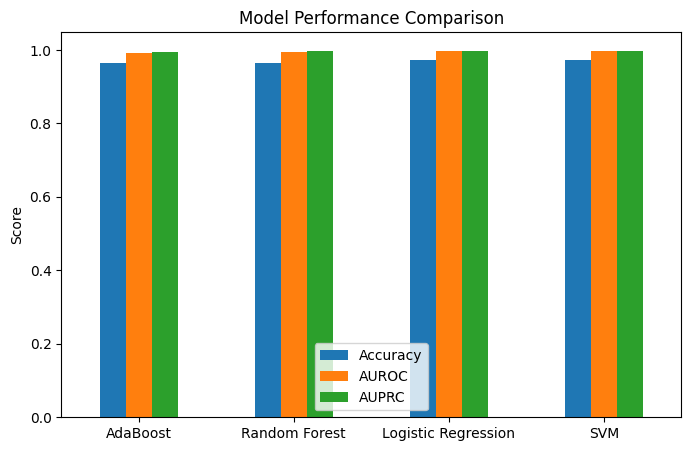

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from ucimlrepo import fetch_ucirepo 

# Load dataset 
# Either Wisconsin Breast Cancer/ Heart disease / cervical cancer risk factors

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']  # Binary classification: 0 (malignant), 1 (benign)

# Data preprocessing
imputer = SimpleImputer(strategy="median")  # Handle missing values if needed
scaler = StandardScaler()  # Standardize features

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
####################
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train models
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)
###################
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
###################
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation metrics
# metrics = {
#     "Accuracy": [accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_rf)],
#     "AUROC": [roc_auc_score(y_test, y_prob_ada), roc_auc_score(y_test, y_prob_rf)],
#     "AUPRC": [average_precision_score(y_test, y_prob_ada), average_precision_score(y_test, y_prob_rf)]
# }

# df_metrics = pd.DataFrame(metrics, index=["AdaBoost", "Random Forest"])
# print(df_metrics)



metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_svm)],
    "AUROC": [roc_auc_score(y_test, y_prob_ada), roc_auc_score(y_test, y_prob_rf), roc_auc_score(y_test, y_prob_log_reg), roc_auc_score(y_test, y_prob_svm)],
    "AUPRC": [average_precision_score(y_test, y_prob_ada), average_precision_score(y_test, y_prob_rf), average_precision_score(y_test, y_prob_log_reg), average_precision_score(y_test, y_prob_svm)]
}

df_metrics = pd.DataFrame(metrics, index=["AdaBoost", "Random Forest", "Logistic Regression", "SVM"])
print(df_metrics)

# Visualization
df_metrics.plot(kind="bar", figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

[0 1 2 3 4]
                     Accuracy     AUROC     AUPRC
AdaBoost             0.508197  0.710040  0.392270
Random Forest        0.508197  0.759028  0.402537
Logistic Regression  0.540984  0.773857  0.438566
SVM                  0.524590  0.770936  0.392905


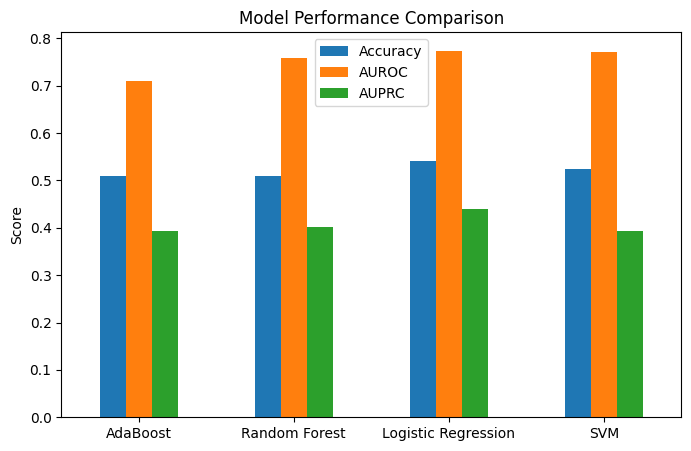

In [5]:
# data = pd.read_csv('heart_disease_uci.csv')
data = fetch_ucirepo(id=45)
# Data
X = data.data.features
y = data.data.targets
# Ensure y is in correct shape (flattened 1D array)
y = y.squeeze()  
print(np.unique(y)) 

# Data preprocessing
imputer = SimpleImputer(strategy="median")  # Handle missing values if needed
scaler = StandardScaler()  # Standardize features

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42, decision_function_shape='ovr')

# Train models
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)
y_pred_rf = rf.predict(X_test)
# y_prob_ada = ada.predict_proba(X_test)[:, 1]
# y_prob_rf = rf.predict_proba(X_test)[:, 1]

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
# y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
# y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Get probabilities for each class
y_prob_ada = ada.predict_proba(X_test)
y_prob_rf = rf.predict_proba(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)
y_prob_svm = svm.predict_proba(X_test)

# Evaluation metrics
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_svm)],
    "AUROC": [roc_auc_score(y_test, y_prob_ada, multi_class='ovr'), roc_auc_score(y_test, y_prob_rf, multi_class='ovr'), roc_auc_score(y_test, y_prob_log_reg, multi_class='ovr'), roc_auc_score(y_test, y_prob_svm, multi_class='ovr')],
    "AUPRC": [average_precision_score(y_test, y_prob_ada, average='macro'), average_precision_score(y_test, y_prob_rf, average='macro'), average_precision_score(y_test, y_prob_log_reg, average='macro'), average_precision_score(y_test, y_prob_svm, average='macro')]
}

df_metrics = pd.DataFrame(metrics, index=["AdaBoost", "Random Forest", "Logistic Regression", "SVM"])
print(df_metrics)

# Visualization
df_metrics.plot(kind="bar", figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

[0 1]
                     Accuracy     AUROC     AUPRC
AdaBoost             0.994186  0.994012  0.743333
Random Forest        0.988372  0.996407  0.876667
Logistic Regression  0.994186  0.997605  0.926667
SVM                  0.982558  0.994012  0.710000


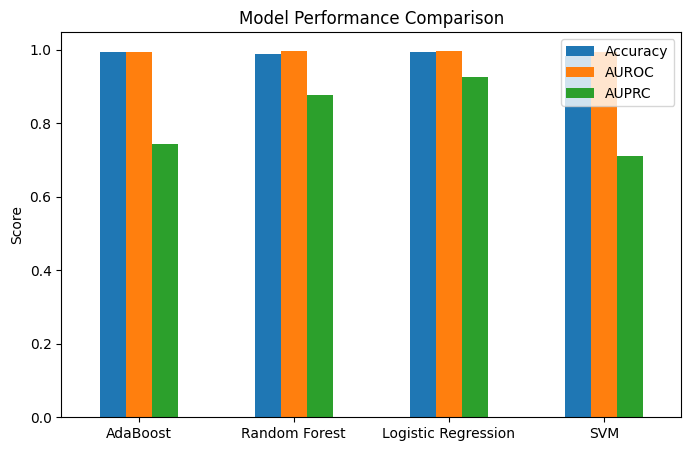

In [6]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')
# cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
# print(data.columns)

# Replace non-numeric placeholders like '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert columns to numeric where applicable, forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Separate features (X) and target (y)
target_column = 'Dx:Cancer'  # Update with your actual target column

# Ensure target column is in numeric format (if not already)
data[target_column] = pd.to_numeric(data[target_column], errors='coerce')
                     
# Data
X = data.drop(target_column, axis=1)  # Features, drop the target column
y = data[target_column]  # Target column
# Ensure y is in correct shape (flattened 1D array)
# y = y.squeeze()  
print(np.unique(y)) 

# Data preprocessing
imputer = SimpleImputer(strategy="median")  # Handle missing values if needed
scaler = StandardScaler()  # Standardize features

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train models
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# # Get probabilities for each class
# y_prob_ada = ada.predict_proba(X_test)
# y_prob_rf = rf.predict_proba(X_test)
# y_prob_log_reg = log_reg.predict_proba(X_test)
# y_prob_svm = svm.predict_proba(X_test)

# Evaluation metrics
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_svm)],
    "AUROC": [roc_auc_score(y_test, y_prob_ada), roc_auc_score(y_test, y_prob_rf), roc_auc_score(y_test, y_prob_log_reg), roc_auc_score(y_test, y_prob_svm)],
    "AUPRC": [average_precision_score(y_test, y_prob_ada), average_precision_score(y_test, y_prob_rf), average_precision_score(y_test, y_prob_log_reg), average_precision_score(y_test, y_prob_svm)]
}

df_metrics = pd.DataFrame(metrics, index=["AdaBoost", "Random Forest", "Logistic Regression", "SVM"])
print(df_metrics)

# Visualization
df_metrics.plot(kind="bar", figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [ ]:
# Breast cancer wisconsin dataset results
#                      Accuracy     AUROC     AUPRC
# AdaBoost             0.964912  0.992139  0.994919
# Random Forest        0.964912  0.995251  0.996998
# Logistic Regression  0.973684  0.997380  0.998380
# SVM                  0.973684  0.997380  0.998415


# Heart disease dataset results
#                      Accuracy     AUROC     AUPRC
# AdaBoost             0.508197  0.710040  0.392270
# Random Forest        0.508197  0.759028  0.402537
# Logistic Regression  0.540984  0.773857  0.438566
# SVM                  0.524590  0.770936  0.392905

# cervical cancer risk factors dataset results
#                      Accuracy     AUROC     AUPRC
# AdaBoost             0.994186  0.994012  0.743333
# Random Forest        0.988372  0.996407  0.876667
# Logistic Regression  0.994186  0.997605  0.926667
# SVM                  0.982558  0.994012  0.710000